In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [5]:
from scripts import load, utils

## Fig 5 : Energy extrapolation

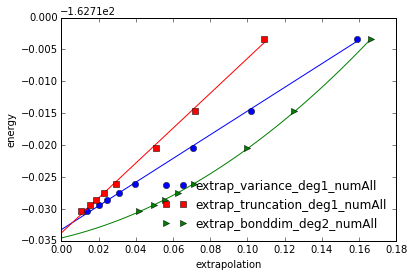

In [11]:
L = 128
filling = 0.875

all_extraps = []
all_extraps.append((1., utils.Extrapolation('variance', deg=1, num_points=None)))
all_extraps.append((1e4, utils.Extrapolation('truncation', deg=1, num_points=None)))
all_extraps.append((200, utils.Extrapolation('bonddim', deg=2, num_points=None)))

markers = 'os>v*'
colors  = 'brgk' 

figure()
for i,(scale_factor,bond_dim) in enumerate(all_extraps):
    d, props = load.extrapolation('energy', L=L, filling=filling, bond_dim=bond_dim)

    fit_coeff = props['fitted_coeff']
    xfit = linspace(0,max(d[:,0]))
    yfit = polyval(fit_coeff, xfit)
    
    sel = np.ones(len(xfit), dtype=bool)
    if 'fit_cut' in props:
        fit_cut = float(props['fit_cut'])
        sel = xfit <= fit_cut
    plot(scale_factor*xfit[sel], yfit[sel], '-', color=colors[i])
    plot(scale_factor*xfit[-sel], yfit[-sel], '--', color=colors[i])

    plot(scale_factor*d[:,0], d[:,1], markers[i], color=colors[i], label=str(bond_dim))
legend(loc='best', frameon=False)
xlabel('extrapolation')
ylabel('energy')